# BGC-Argo Quality Control

This is a jupyter notebook to demonstrate the fucntionality of the `bgcArgo` python module, which is based on the SOCCOM set of matlab code for performing the same task. In order to perform these tasks, WOA, NCEP, and Argo data must be available. These must be downloaded to your local machine (which can be done using `bgcArgo`, shown below). Plan to add functionality to get the necessary data remotely.

In [30]:
%matplotlib inline
from ipywidgets import interactive, fixed

from pathlib import Path
from bgcArgo import argo

Set up appropriate local directories:

In [31]:
datadir   = Path('/Users/gordonc/Documents/data')
woa_path  = datadir / 'WOA18'
ncep_path = datadir / 'NCEP'
argo_path = datadir / 'Argo/meds'

You can tell `bgcArgo` where your local directories are set up, or specify the path to each function:

In [32]:
argo.set_dirs(woa_path=woa_path, ncep_path=ncep_path, argo_path=argo_path)

If the data is not already saved to your local machine, you can use the module to download the reference data as well as Argo data:
```{python}
import bgcArgo

# get the reference data
bgcArgo.io.get_woa18('O2sat', local_path=woa_path)
bgcArgo.io.get_ncep('pres', local_path=ncep_path)
# get argo data for float 4902481, could provide more float numbers
dacdir = '/ifremer/argo/dac/meds'
wmo_numbers = [4902481]
bgcArgo.io.get_argo(dac_path, wmo_numbers, local_path=argo_path)
```
With reference data downloaded, float data is easily loaded into an object that will have fields for each float variable:

In [33]:
flt = argo(4902481)

This creates a `class argo` which has various methods attached to it for visualization and QC. Example of plotting profiles:

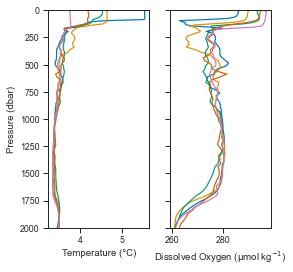

In [34]:
w = interactive(flt.plot, kind=fixed('profiles'), 
                varlist=[('T and O2',['TEMP', 'DOXY']),
                         ('Physics',['TEMP', 'PSAL', 'PDEN'])],
                Ncycle=(1, flt.N_CYCLES), Nprof=(1,10), zvar=['PRES', 'PDEN'])
display(w)

time section: 

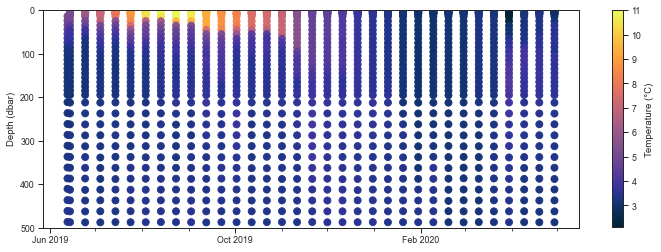

In [35]:
w = interactive(flt.plot, kind=fixed('cscatter'), varname=['TEMP','PSAL','DOXY'], ylim=fixed((0,500)))
display(w)

Can calculate oxygen gain using WOA or NCEP data as reference values:

In [36]:
woa_gains  = flt.calc_gains(ref='WOA')
ncep_gains = flt.calc_gains(ref='NCEP')

print('WOA Gains:', woa_gains, '\n')
print('NCEP Gains: ', ncep_gains)

Extracting WOA data for Jan
Extracting WOA data for Feb
Extracting WOA data for Mar
Extracting WOA data for Apr
Extracting WOA data for May
Extracting WOA data for Jun
Extracting WOA data for Jul
Extracting WOA data for Aug
Extracting WOA data for Sep
Extracting WOA data for Oct
Extracting WOA data for Nov
Extracting WOA data for Dec

Calculating gains using WOA surface data and float O2 percent saturation...

Calculating gains using NCEP surface pressure and float in-air measurements...
WOA Gains: [1.00838901 1.01652513 1.00907195 0.99278253 1.02729106 1.04765207
 1.03841231 1.02583086 1.01263201 1.01799767 1.03774679 1.04289965
 1.03957234 1.0372055  1.03833366 1.03583223 1.05015862 1.05643221
 1.04423111 1.04552101 1.04590617 1.04163522 1.04344583 1.05341063
 1.06035864 1.06319964 1.07458747 1.08092759 1.0820653  1.072926
 1.05292626 1.07914297 1.08421562 1.06910948] 

NCEP Gains:  [1.22571727 1.24358498 1.19382785 1.24697541 1.29861159 1.28214657
 1.2918855  1.26711397 1.28986839 1

Results can be plotted:

In [ ]:
w = interactive(flt.plot, kind=fixed('gain'), ref=['WOA', 'NCEP'])
display(w)

The `argo` object allows for easy plotting and data access, but if you just want to load the data from the float for your own use, that can easily be done as well:

In [ ]:
# get a python dictionary
float_dict = flt.to_dict()
# create a pandas dataframe
float_df = flt.to_dataframe()
print(float_df.head())

Next steps:
* More validation against SOCCOM matlab code
* Validation against already DMQC'ed Argo floats
* Right now works with Argo synthetic profiles (and BRtraj for in-air data) - will probably want to build individual profile functionality as well
* Optode response time correction
* Access data remotely - both reference and Argo data sets
* Have it work well with BODC version of OWC code?